<a href="https://colab.research.google.com/github/reban87/ML-Projects/blob/main/Mnist_dataset_for_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### MNIST Digit dataset Classification **Multiclass Classification** using Tensorflow and optimizing the performance using Convolution Neural Network

In [ ]:
# import the library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# Check the version of tensorflow
tf.__version__

'2.5.0'

In [ ]:
# Download the datasets from keras library

from keras.datasets import mnist
(train_data,train_labels),(test_data,test_labels)=mnist.load_data()

In [ ]:
#Let's visualize some of the data
print(f"Training Data:\n {train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training Data:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

Text(0.5, 1.0, '3')

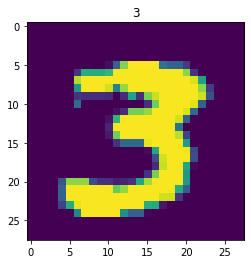

In [ ]:
# Lets visualize it using plot function
import matplotlib.pyplot as plt
index=27
plt.imshow(train_data[index])
plt.title(train_labels[index])


In [ ]:
import random

In [ ]:
class_names=['0','1','2','3','4','5','6','7','8','9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

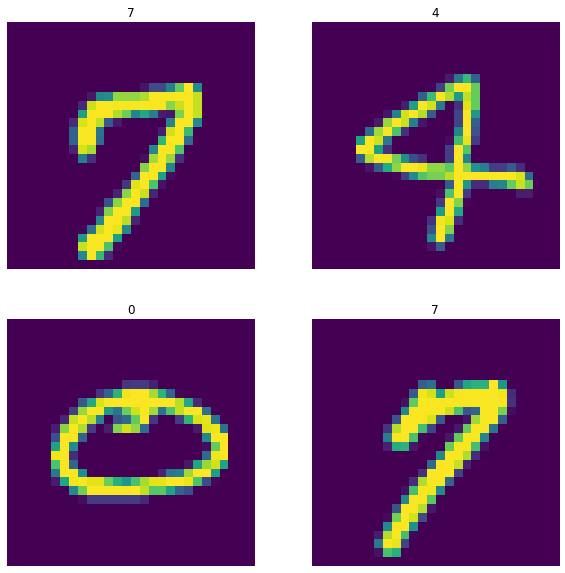

In [ ]:
# Let's visualize some of the traning images using subplots
import random
plt.figure(figsize=(10,10))

for i in range(4):
  plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=None)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



Lets make the model to classify the images into respective images...
we need to know the shapes of the images

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
#Lets build our first ANN model using tensorflow
# Set random seed 

tf.random.set_seed(42)

# 1. Create a model
model_1=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3.Fit the model
history_1=model_1.fit(train_data,
            train_labels,
            epochs=20,
            validation_data=(test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4993 - accuracy: 0.1116 - val_loss: 2.3002 - val_accuracy: 0.1141
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9961 - accuracy: 0.2120 - val_loss: 1.8645 - val_accuracy: 0.2302
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.8145 - accuracy: 0.2559 - val_loss: 1.7891 - val_accuracy: 0.2805
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7783 - accuracy: 0.2692 - val_loss: 1.7779 - val_accuracy: 0.2855
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7456 - accuracy: 0.2859 - val_loss: 1.7218 - val_accuracy: 0.3233
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7096 - accuracy: 0.3090 - val_loss: 1.6834 - val_accuracy: 0.3064
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6440 - accuracy: 0.3339 - val_loss: 1.6045 - val_accuracy:

In [ ]:
#The accuracy doesn't seem to be good..lets try to normalize the training data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
#let's try to normalize the training data by dividing 255 for all
norm_train_data=train_data/255.0
norm_test_data=test_data/255.0


In [ ]:
norm_train_data.min(), norm_test_data.max()

(0.0, 1.0)

In [ ]:
#Now lets build the ANN model wheather it increases the accuracy

# Create a random seed
tf.random.set_seed(42)

# 1.Create a model
model_2=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
history_2=model_2.fit(norm_train_data,
                      train_labels,
                      epochs=20,
                      validation_data=(norm_test_data,test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6970 - accuracy: 0.7717 - val_loss: 0.6814 - val_accuracy: 0.7860
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6434 - accuracy: 0.8000 - val_loss: 0.6276 - val_accuracy: 0.8119
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6126 - accuracy: 0.8127 - val_loss: 0.6022 - val_accuracy: 0.8223
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5926 - val_accuracy: 0.8231
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.5817 - val_accuracy: 0.8277
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5625 - accuracy: 0.8316 - val_loss: 0.5828 - val_accuracy:

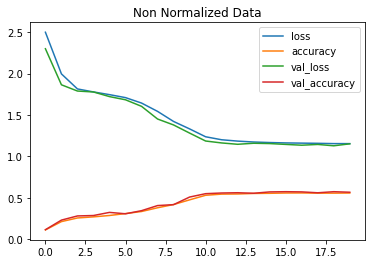

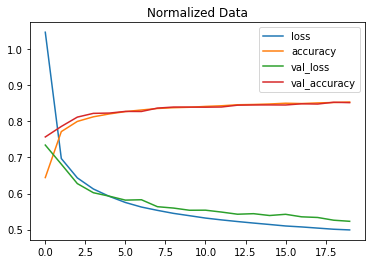

In [ ]:
# Lets compare the normalized VS non normalized model

import pandas as pd
pd.DataFrame(history_1.history).plot(title="Non Normalized Data")
pd.DataFrame(history_2.history).plot(title="Normalized Data")

 Since we are using Adam optimizer, we can set the learning rate... First let's determine the ideal learning rate for our model....
 To do so, lets use callbacks function while building our model


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1.Create the model
model_3=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create a callback function to determine the ideal learning rate
lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))

# 4.Fit the model
history_3=model_3.fit(norm_train_data,
                      train_labels,
                      epochs=40,
                      
                      
                      
                      
                      
                      
                      
                      
                      edular,
                      validation_data=(norm_test_data,
                                       test_labels))


Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6951 - accuracy: 0.7727 - val_loss: 0.6813 - val_accuracy: 0.7868
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6390 - accuracy: 0.8026 - val_loss: 0.6174 - val_accuracy: 0.8157
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6063 - accuracy: 0.8159 - val_loss: 0.5949 - val_accuracy: 0.8214
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5842 - accuracy: 0.8243 - val_loss: 0.5835 - val_accuracy: 0.8259
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5671 - accuracy: 0.8300 - val_loss: 0.5744 - val_accuracy: 0.8309
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5531 - accuracy: 0.8341 - val_loss: 0.5719 - val_accuracy:

Text(0.5, 1.0, 'Findint the learning rate')

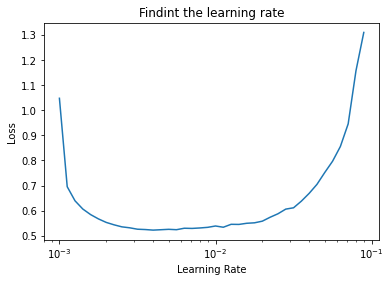

In [ ]:
# Lets see the ideal learning rate using the graph

lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,history_3.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning Rate")
plt.title("Findint the learning rate") 

In [ ]:
# It seems we have 0.001 is the ideal rate for our model

# Set random seed
tf.random.set_seed(42)

# 1.Create a model
model_4=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# 2.Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])

# 3.Fit the model
history_4=model_4.fit(norm_train_data,
                      train_labels,
                      epochs=40,
                      validation_data=(norm_test_data,
                                       test_labels))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0472 - accuracy: 0.6442 - val_loss: 0.7344 - val_accuracy: 0.7569
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6970 - accuracy: 0.7717 - val_loss: 0.6814 - val_accuracy: 0.7860
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6434 - accuracy: 0.8000 - val_loss: 0.6276 - val_accuracy: 0.8119
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6126 - accuracy: 0.8127 - val_loss: 0.6022 - val_accuracy: 0.8223
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5921 - accuracy: 0.8207 - val_loss: 0.5926 - val_accuracy: 0.8231
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.5817 - val_accuracy: 0.8277
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5625 - accuracy: 0.8316 - val_loss: 0.5828 - val_accuracy:

In [ ]:
# Let's draw the confusion matrix

from sklearn.metrics import confusion_matrix

In [ ]:
# Crete a Confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15):

  #Create the confusion matrix
  cm=confusion_matrix(y_true,tf.round(y_pred))
  cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
  n_classes=cm.shape[0]

  #Let's prettify it
  fig, ax=plt.subplots(figsize=figsize)
  #Create a matrix plot
  cax=ax.matshow(cm,cmap=plt.cm.Reds)
  fig.colorbar(cax)

  # Set labels to be classes

  if classes:
    labels=classes
  else:
    labels=np.arange(cm.shape[0])

  #label the axes
  ax.set(title="confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x-axis label to the  buttom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different color
  threshold = (cm.max() + cm.min()) / 2.

  #Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size = text_size)


In [ ]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
#Let's make some prediction with our model
y_probs=model_4.predict(norm_test_data)
y_probs[:5]

array([[5.9871390e-08, 1.1417653e-05, 1.6812494e-11, 2.3070452e-05,
        1.3858075e-07, 8.8577258e-07, 3.4313396e-14, 9.9535513e-01,
        2.4996389e-06, 4.6068509e-03],
       [9.8337083e-10, 7.4943948e-08, 9.8273969e-01, 1.0375444e-04,
        6.2479221e-13, 1.2394993e-04, 1.6749902e-02, 1.8878351e-26,
        2.8269165e-04, 2.0121769e-13],
       [6.2600034e-03, 8.6466146e-01, 8.8668220e-02, 1.4063592e-02,
        9.7801225e-05, 9.7239349e-04, 2.3693789e-04, 6.1924588e-03,
        9.0960553e-03, 9.7510843e-03],
       [9.1036379e-01, 2.6576564e-04, 1.0228601e-03, 5.6978802e-06,
        2.1298014e-05, 2.0807404e-03, 1.0392581e-02, 1.8951688e-08,
        7.5051315e-02, 7.9596555e-04],
       [9.1036875e-04, 1.5609628e-05, 3.0157997e-04, 5.8261900e-05,
        9.5376313e-01, 3.0145948e-03, 5.8411560e-03, 7.2116440e-04,
        1.4864594e-04, 3.5225462e-02]], dtype=float32)

In [ ]:
y_probs[0]

array([5.9871390e-08, 1.1417653e-05, 1.6812494e-11, 2.3070452e-05,
       1.3858075e-07, 8.8577258e-07, 3.4313396e-14, 9.9535513e-01,
       2.4996389e-06, 4.6068509e-03], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.9871390e-08, 1.1417653e-05, 1.6812494e-11, 2.3070452e-05,
        1.3858075e-07, 8.8577258e-07, 3.4313396e-14, 9.9535513e-01,
        2.4996389e-06, 4.6068509e-03], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 '7')

In [ ]:
#Let's convert all the prediction probabilities into integer
y_preds=y_probs.argmax(axis=1)

y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 7])

In [ ]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
#let's draw the simple confusion matrix to visualize it
confusion_matrix(y_preds,test_labels)

array([[ 892,    1,   12,    0,   13,   15,   20,    1,   76,   19],
       [   4, 1079,   28,   12,    0,    1,    1,   28,   25,    4],
       [   2,   20,  919,   39,    6,   10,   23,   15,   14,    1],
       [   0,   10,   10,  847,    1,   60,    0,    8,   20,    8],
       [  10,    1,   12,    3,  864,   23,   14,    9,    7,   46],
       [   1,    2,    1,   42,    1,  625,    5,    0,   78,   10],
       [  34,    1,   14,    4,   27,   12,  891,    0,   19,    3],
       [   1,    3,    6,   12,    9,    1,    0,  904,    5,   45],
       [  22,   16,   26,   39,    1,   92,    4,    0,  705,    7],
       [  14,    2,    4,   12,   60,   53,    0,   63,   25,  866]])

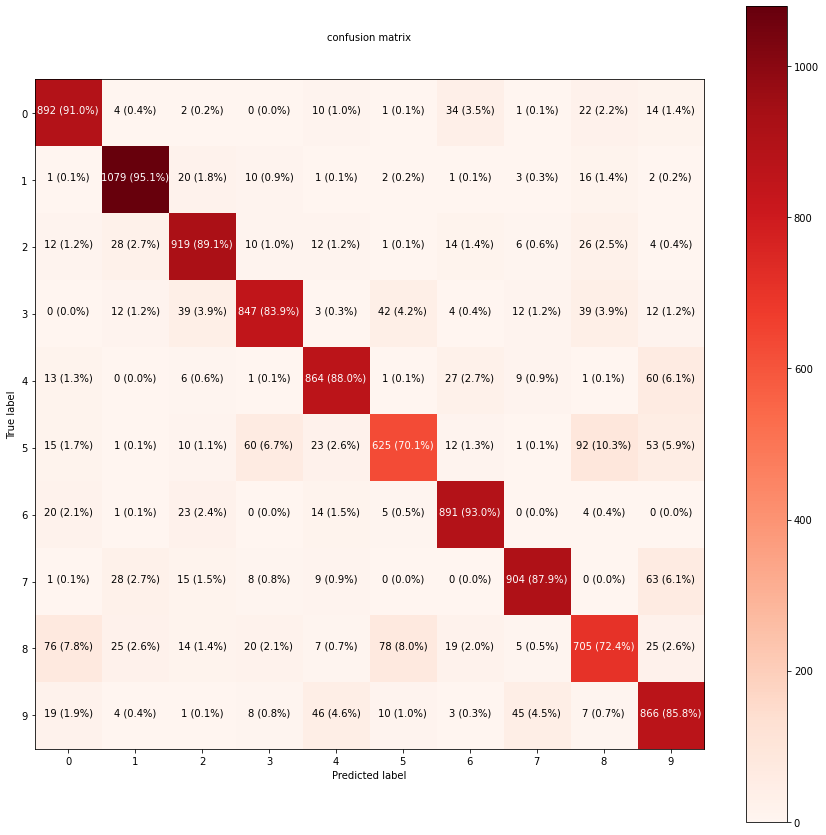

In [ ]:
# Lets make it more prettier
import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
# Lets try to plot the random image with predictions

import random

def plot_random_image(model, images, true_labels, classes):
  """ pick a random image, plot it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images ( in tensor form)
    true_labels: array of ground truth labels for images.
    classes: array of class names for images
  
  Returns:
  A plot pf a random image from `images` with a predicted class label from ` model`
  as well as the truth class label from `true_labels`.
  """ 

  # Setup random integers
  i= random.randint(0,len(images))

  #Create prediction and targets
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28)) # have to reshape to get into right size for model
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  #Plot the target image
  plt.imshow(target_image,cmap=plt.cm.binary)

  #Change the color of the titles depending upon the prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color= "red"
  
  # Add xlabel information (prediction/ true label)

  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color=color) # set the color to red or green

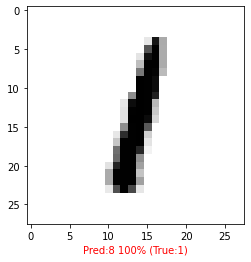

In [ ]:
#Check out the random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)